#TEST

###Q2 Implement both lasso and ridge regression on the given dataset. Adjust the regularization parameter (lambda)  to observe different effects and summarize your findings

***Boston Housing Dataset***

###Import the dataset

In [13]:
import pandas as pd

# Load the dataset
file_path = 'HousingData.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
         B  LSTAT  MEDV  
 0  396.90   4.98  24.0  
 1  396.90   9.14  21.6  
 2  392.83   4.03  34.7  
 3  394.63   2.94  33.4  
 4  396.90    NaN  36.2  ,
 None)

In [14]:
data.shape

(506, 14)

###EDA

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


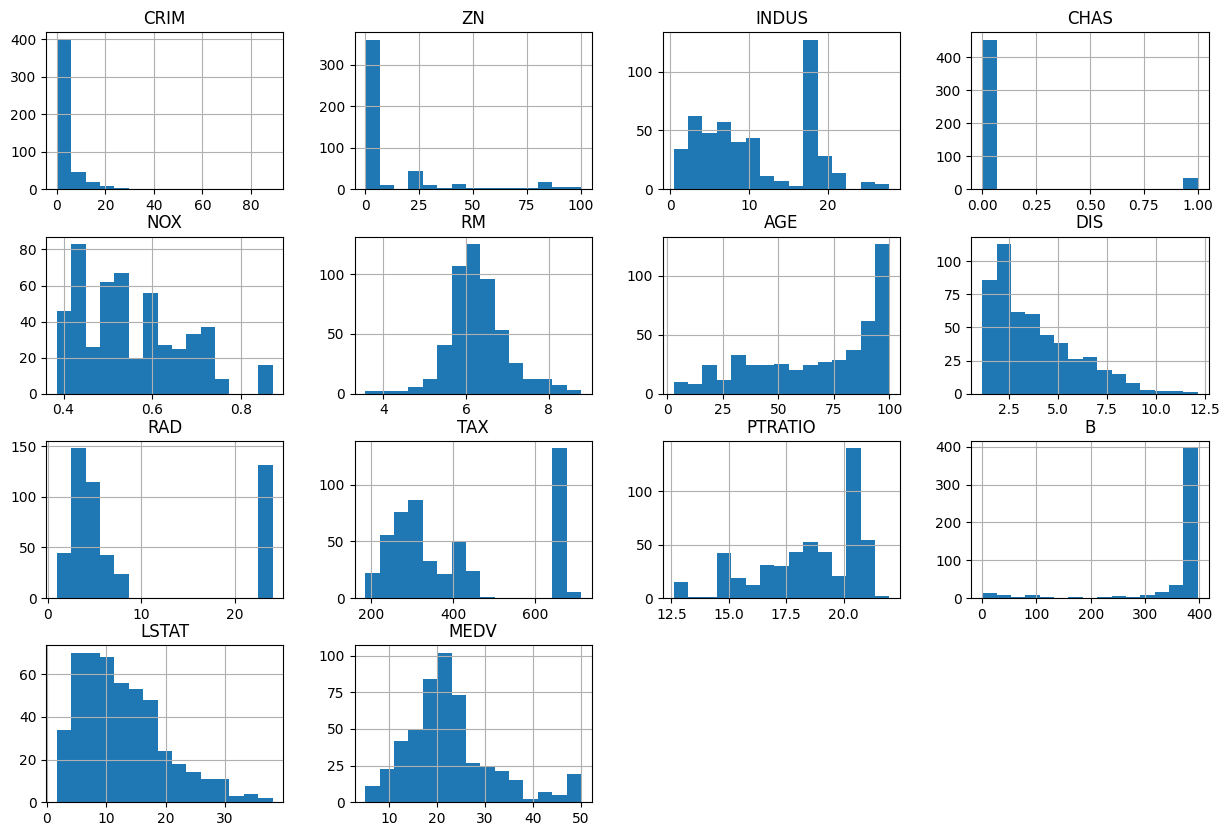

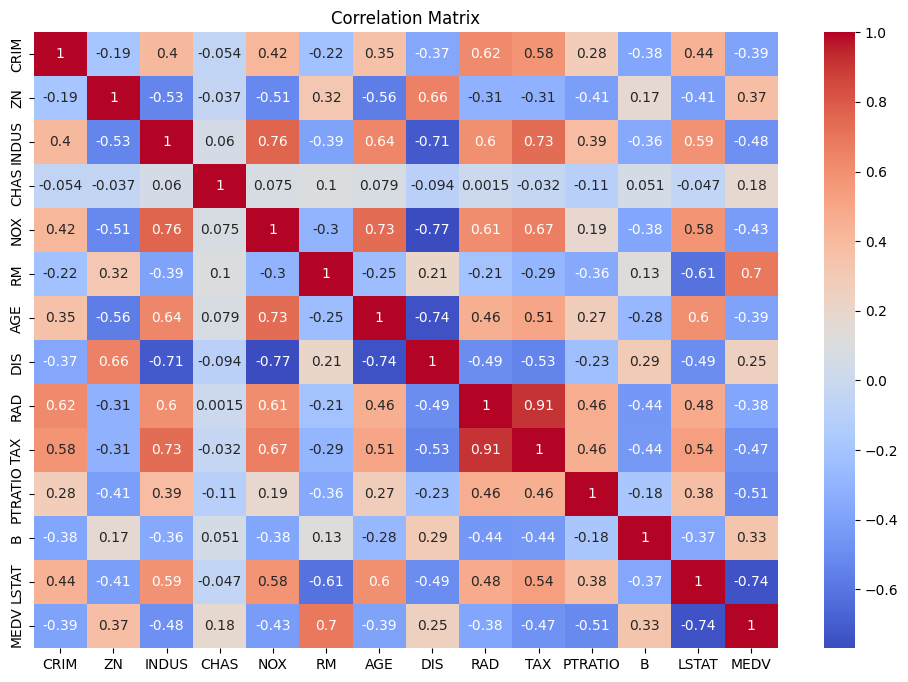

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
data.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


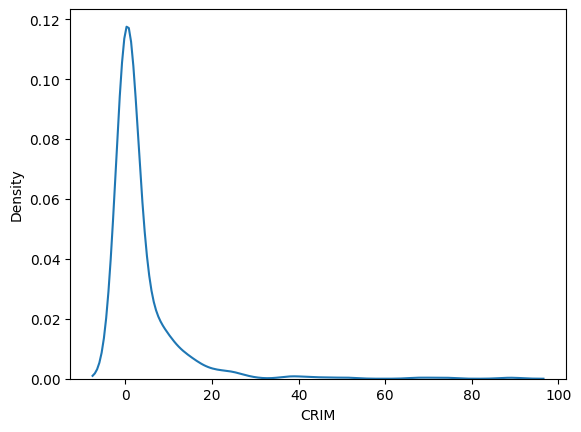

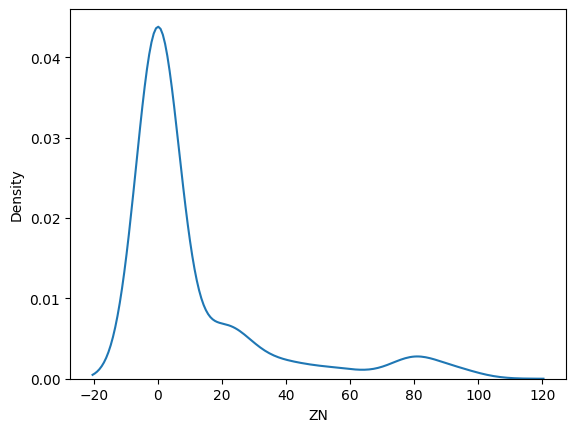

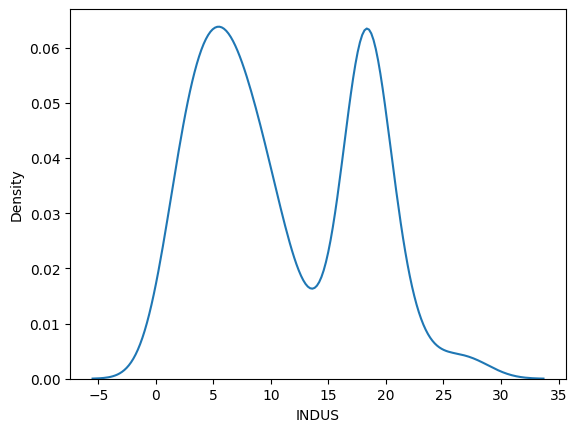

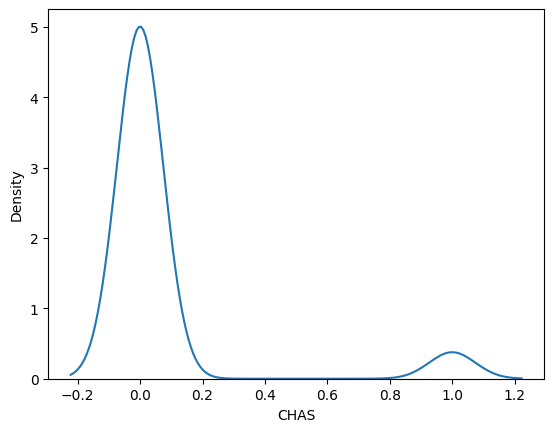

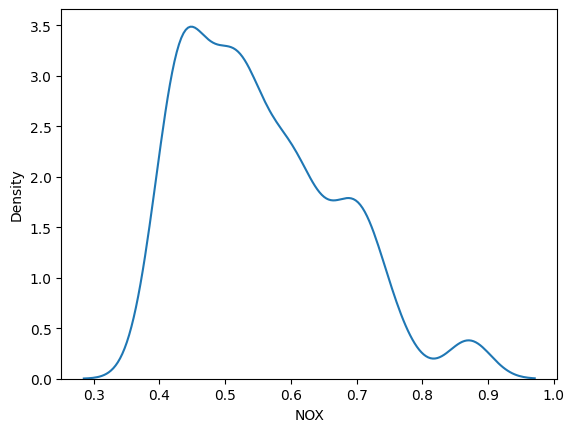

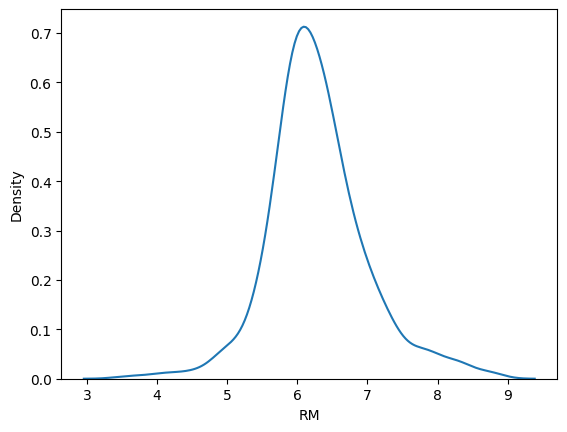

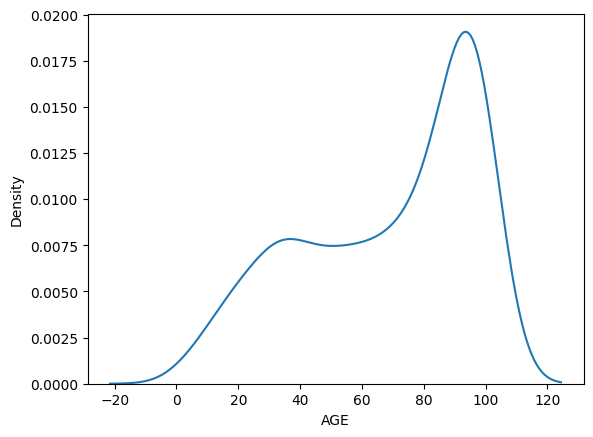

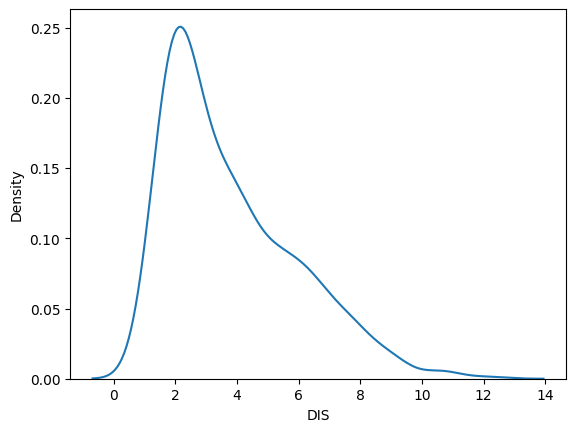

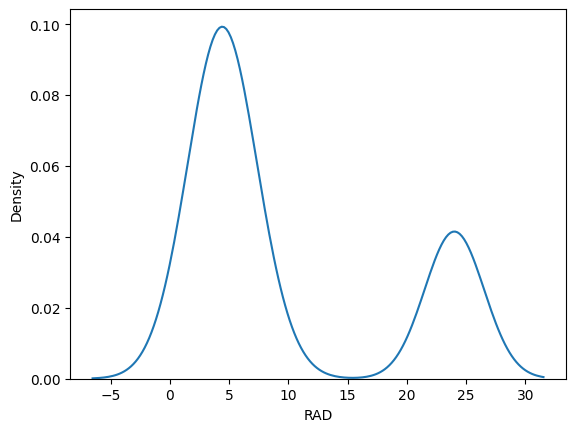

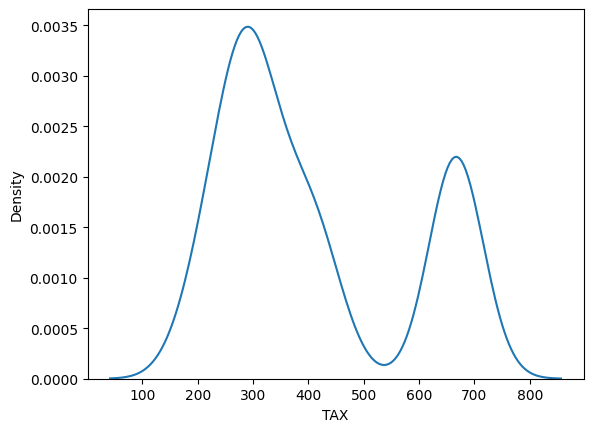

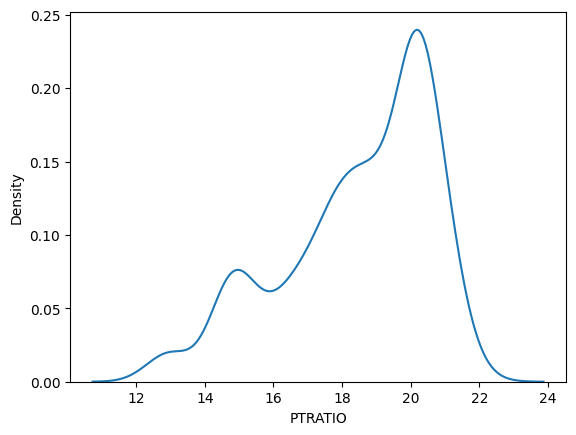

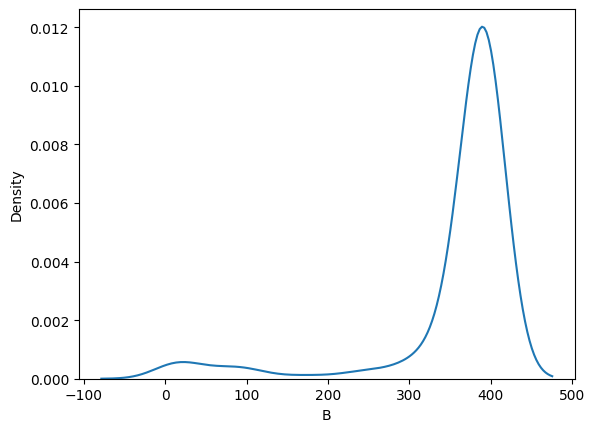

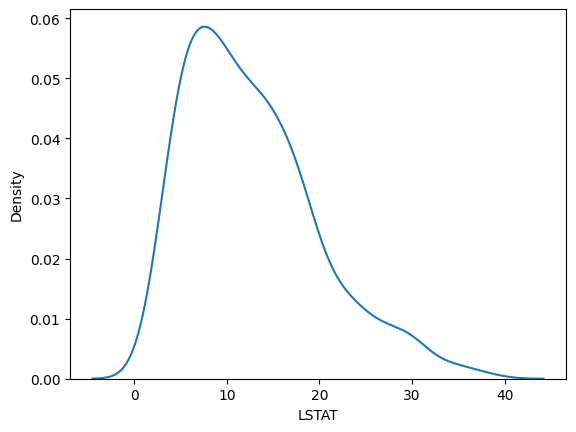

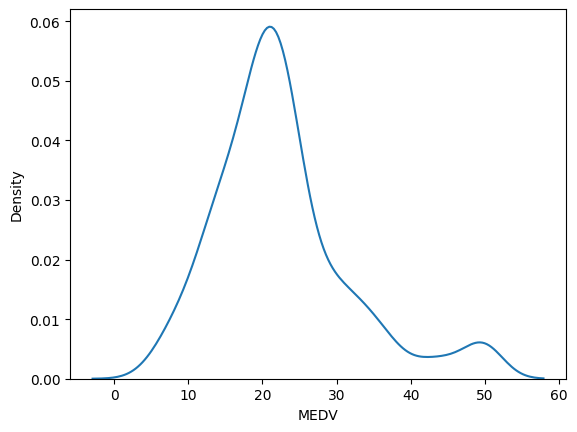

In [18]:
import warnings
warnings.filterwarnings("ignore")
for i in data.columns:
    sns.kdeplot(data = data, x = i)
    plt.show()

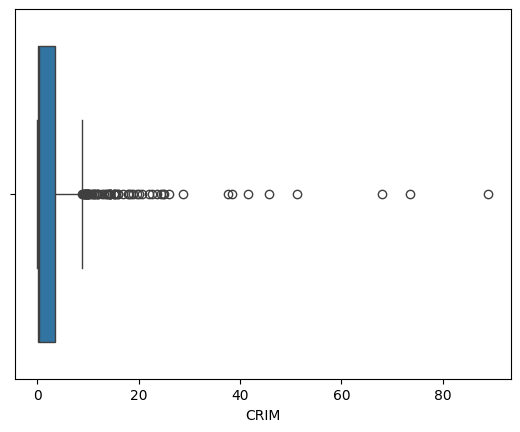

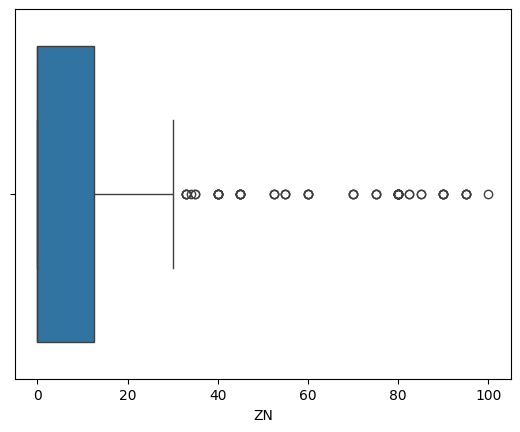

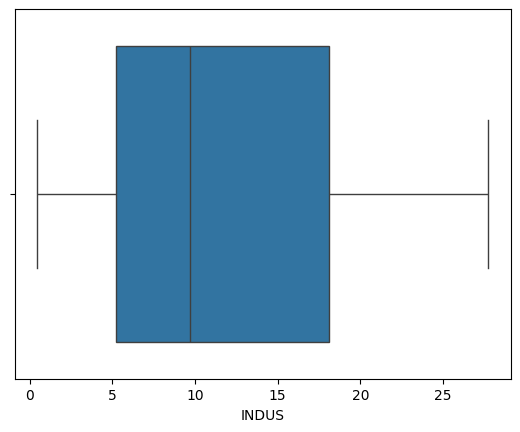

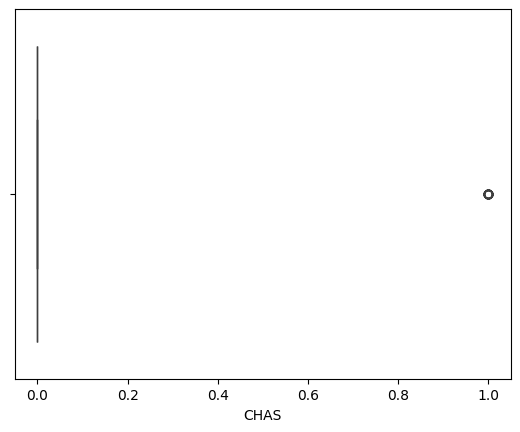

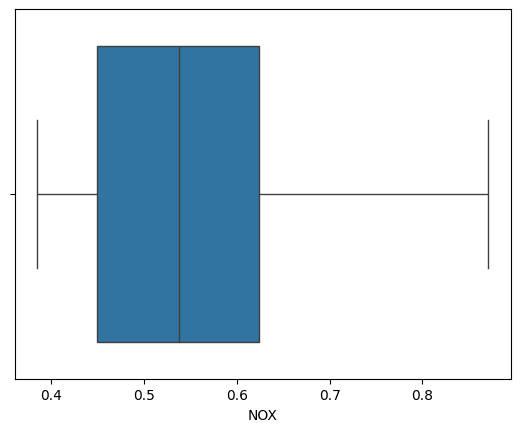

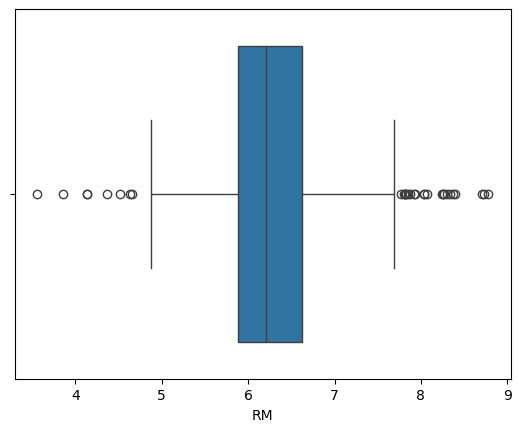

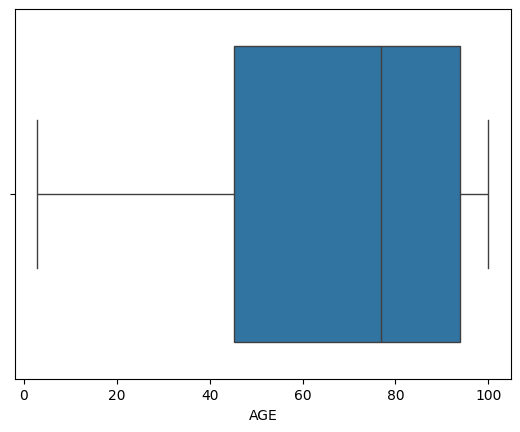

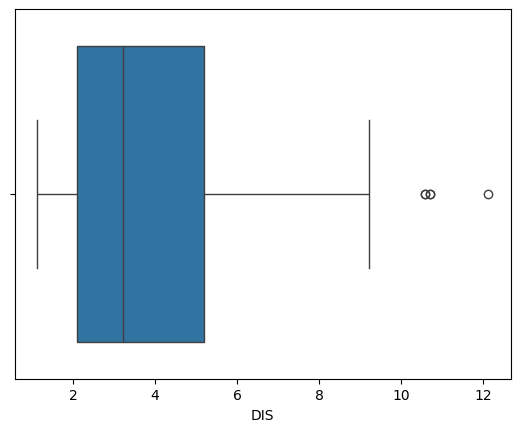

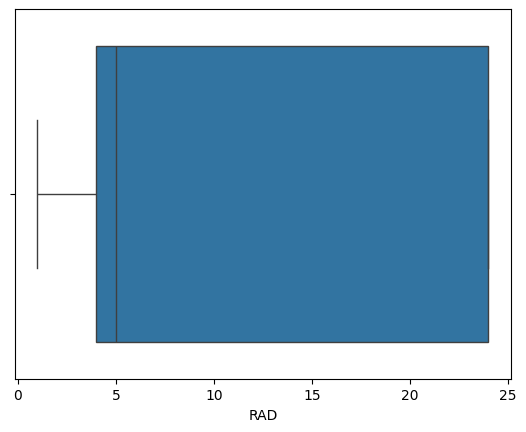

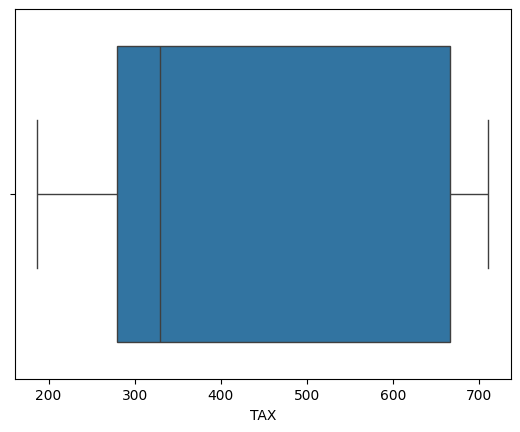

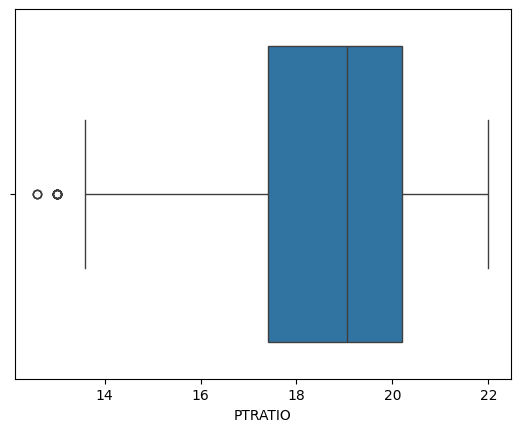

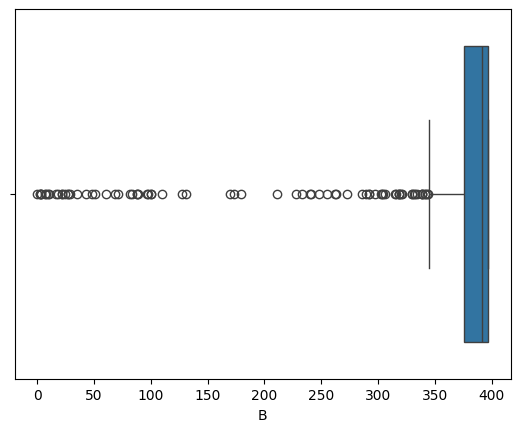

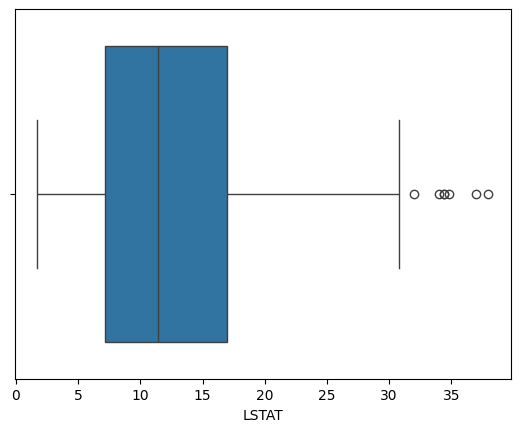

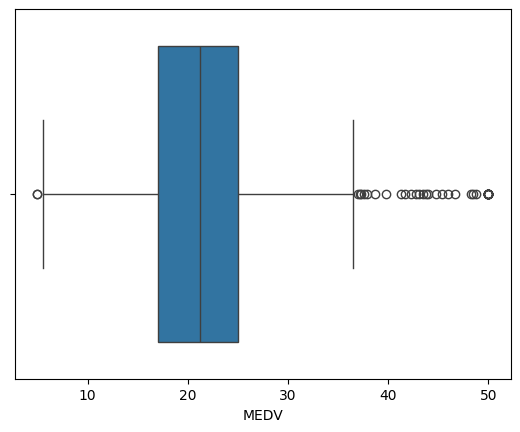

In [20]:
import warnings
warnings.filterwarnings("ignore")
for i in data.columns:
    sns.boxplot(data = data, x = i)
    plt.show()

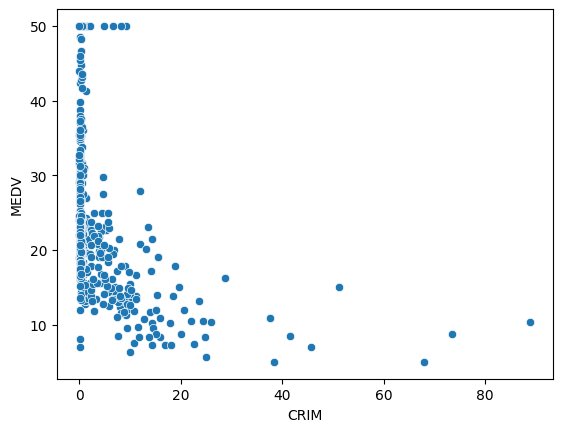

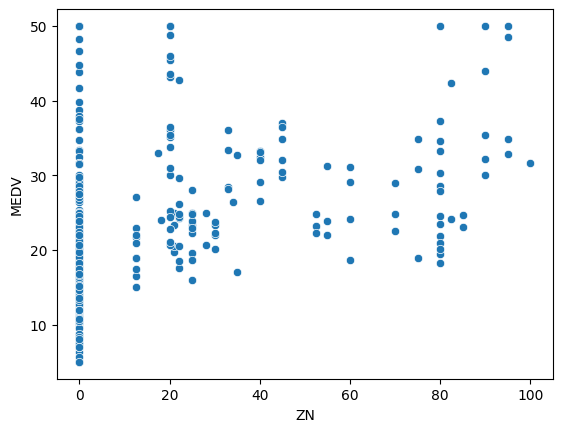

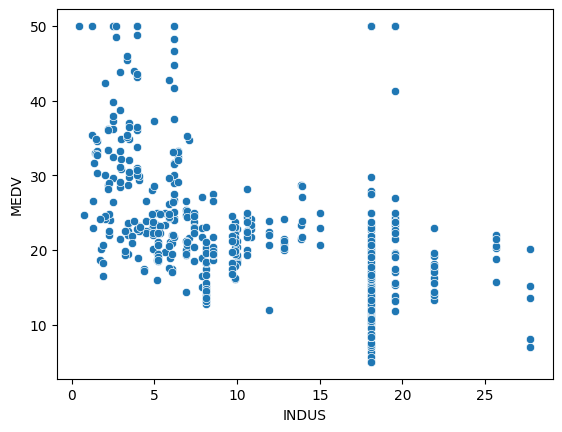

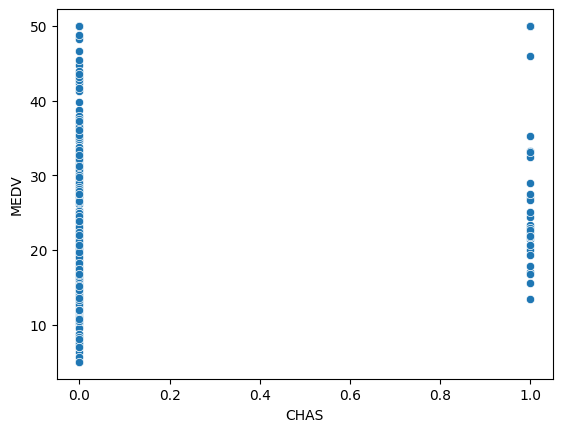

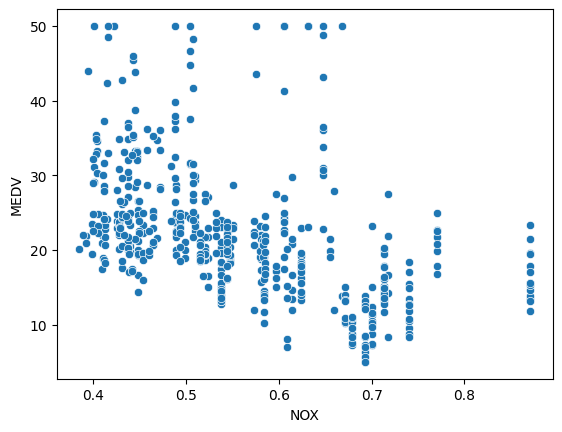

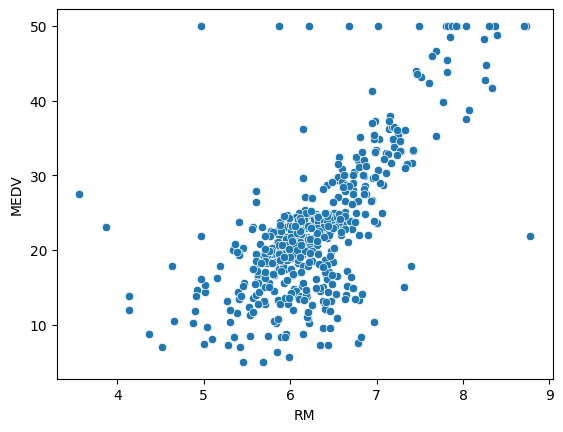

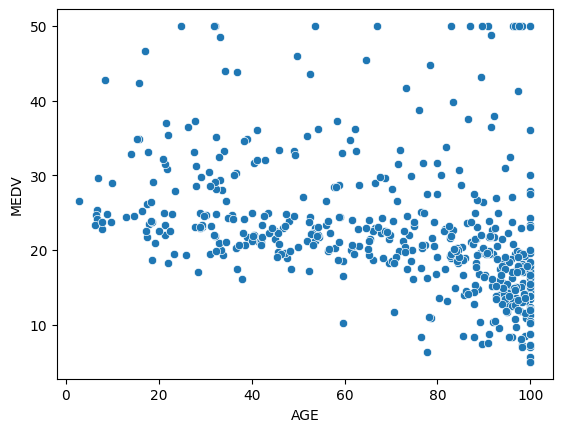

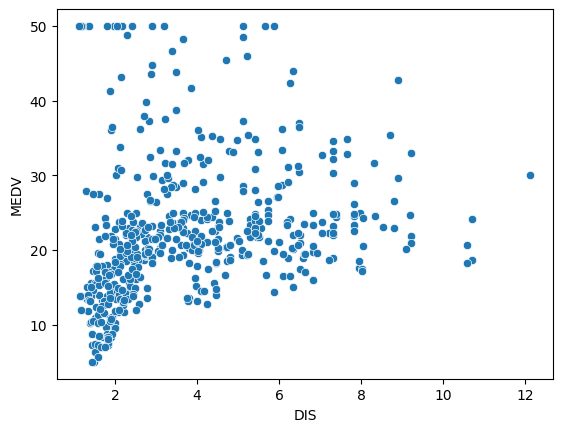

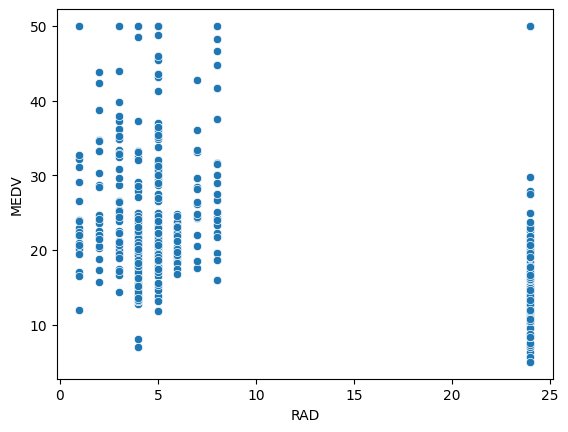

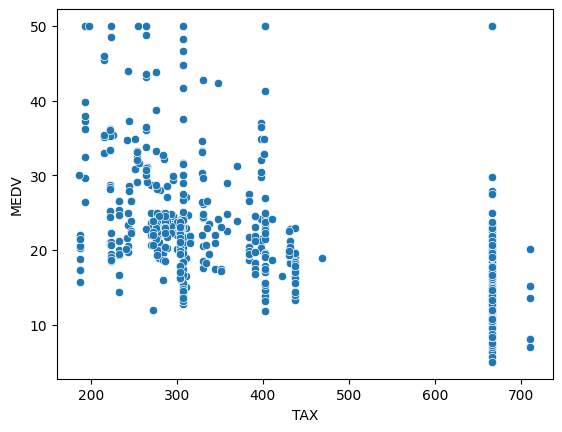

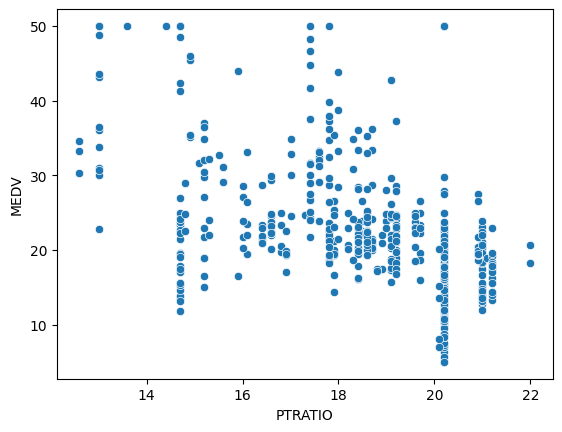

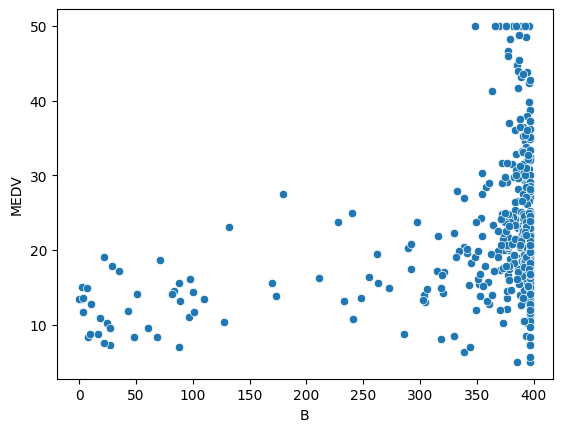

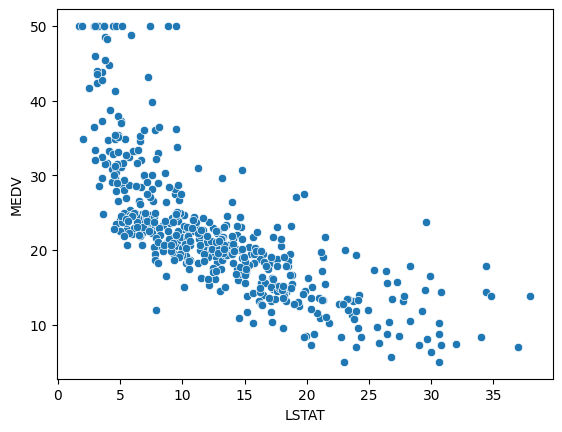

In [22]:
import warnings
warnings.filterwarnings("ignore")
for i in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']:
    sns.scatterplot(data = data, x = i, y = 'MEDV')
    plt.show()

In [24]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

###Handling missing values

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])



Missing Values:
 CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64


In [27]:
for i in ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']:
    data[i] = data[i].fillna(data[i].median())

In [29]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


###Outliers handling

In [30]:
def wisker(col):
    q1, q3 = np.percentile(col, [25,75])
    iqr = q3-q1
    lw = q1 - 1.5 * iqr
    uw = q1 + 1.5 * iqr
    return lw,uw

In [31]:
for i in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']:
    lw,uw = wisker(data[[i]])
    data[i] = np.where(data[i] < lw,lw,data[i])
    data[i] = np.where(data[i] > uw,uw,data[i])

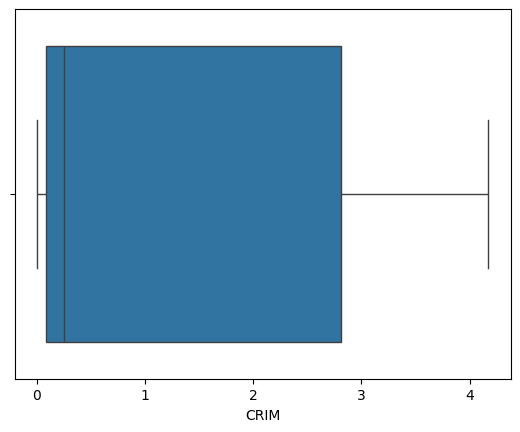

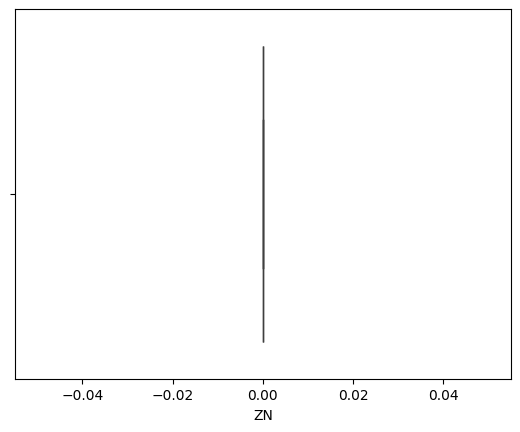

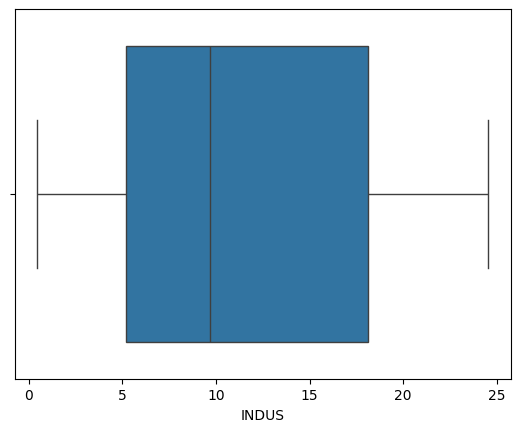

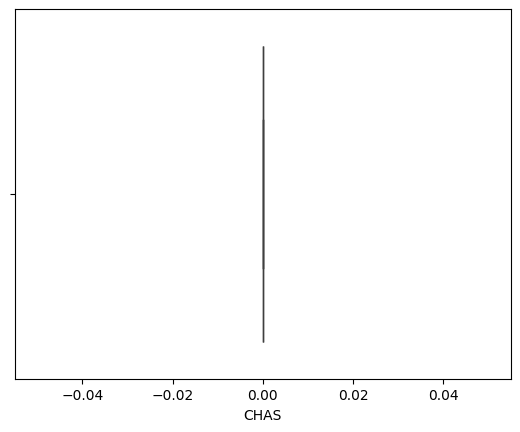

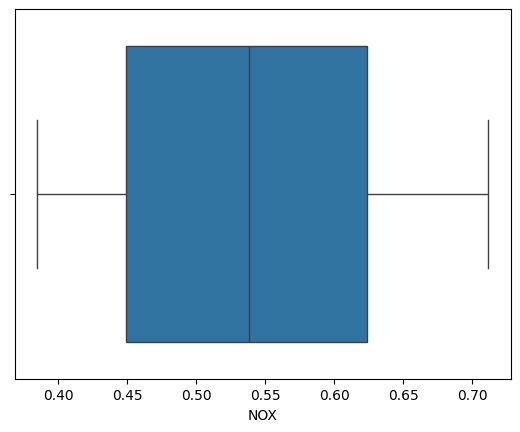

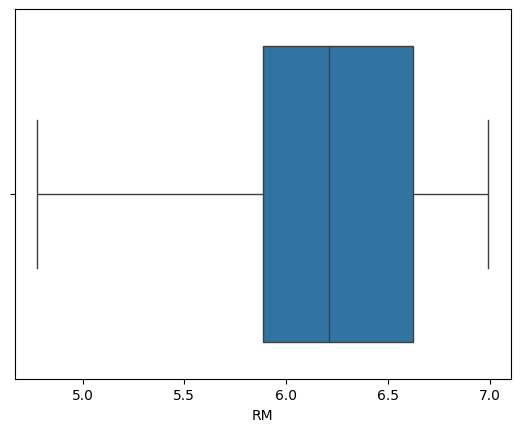

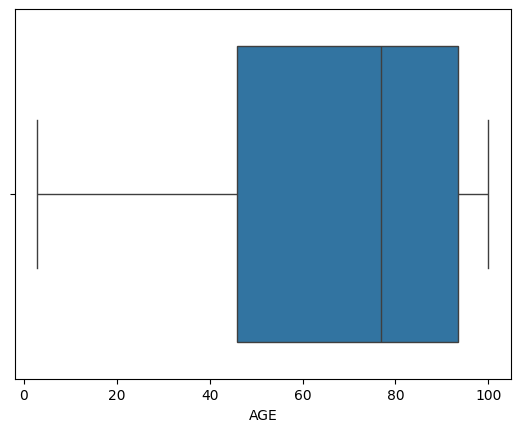

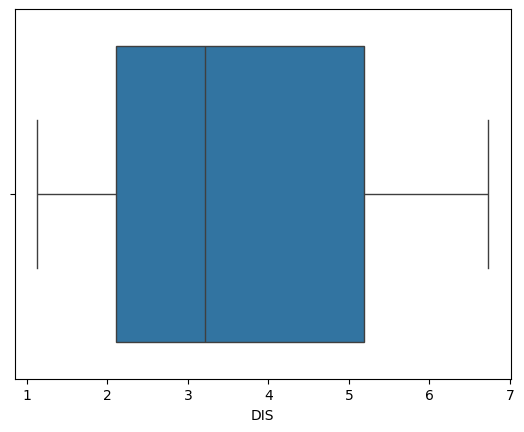

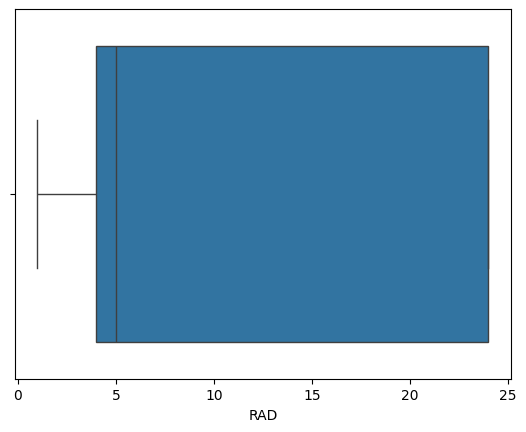

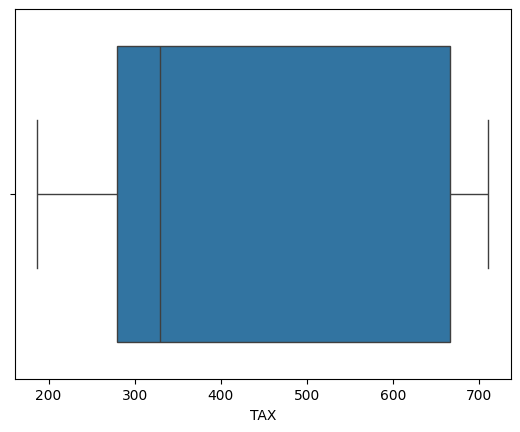

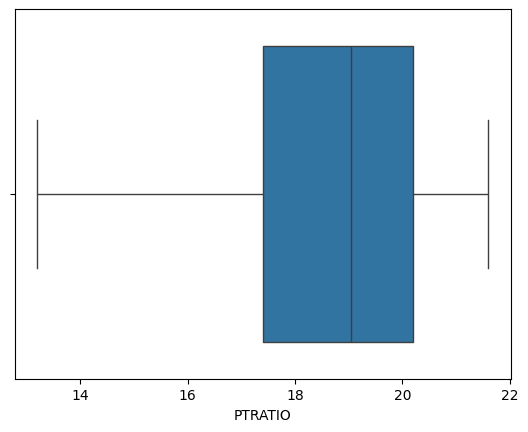

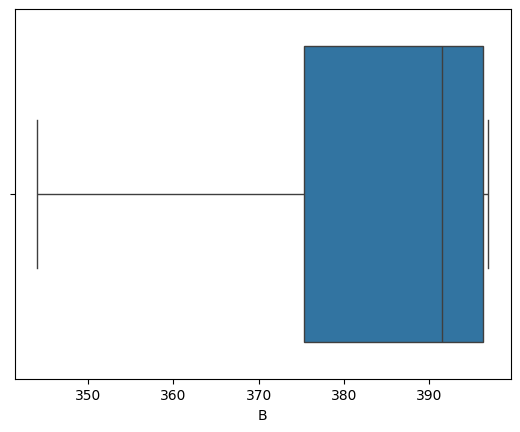

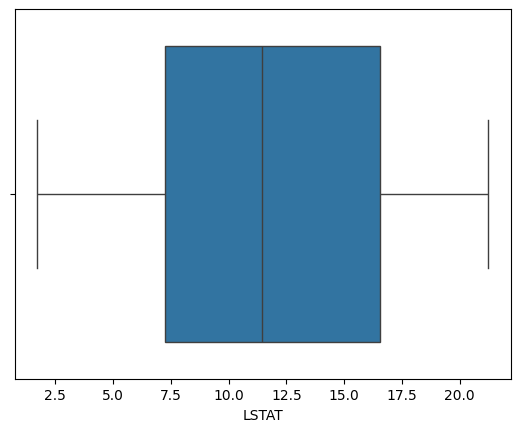

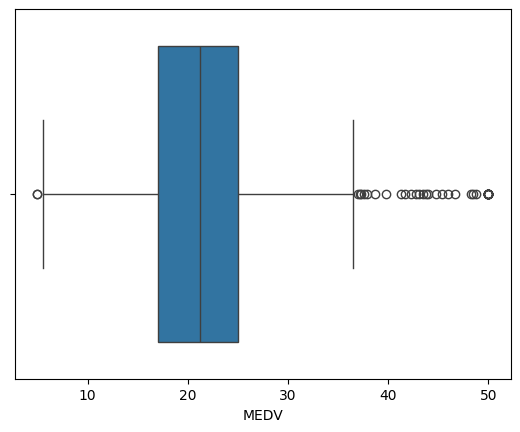

In [32]:
import warnings
warnings.filterwarnings("ignore")
for i in data.columns:
    sns.boxplot(data = data, x = i)
    plt.show()

In [34]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

##Transforming the targeted feature

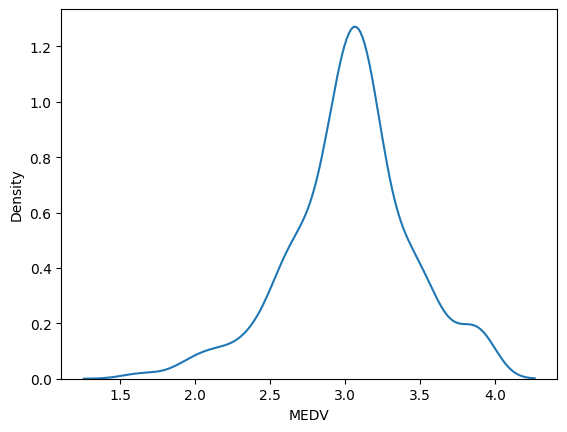

In [35]:
sns.kdeplot(x = np.log(data['MEDV']));

In [37]:
from scipy.stats import boxcox
data['MEDV'], lmd = boxcox(data['MEDV'])

In [38]:
data['MEDV']

,MEDV
0,4.572936
1,4.365582
2,5.336943
3,5.254954
4,5.428607
...,...
501,4.436621
502,4.273824
503,4.564629
504,4.401354


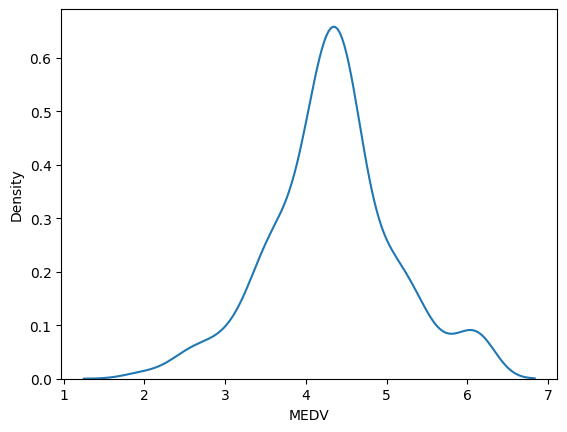

In [39]:
sns.kdeplot(x = data['MEDV']);

###Data is ready to fit in the model
####Start building the model


In [42]:
## import library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## create x,y
x = data.drop('MEDV', axis = 1)
y = data[['MEDV']]

#split data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .3, random_state=55)

#fit model
model = LinearRegression()
model.fit(x_train,y_train)

# predict y
y_predict = model.predict(x_test)
#y_predict

# get r2
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_predict)



0.7091224078669343

In [43]:
# get coefficient
model.coef_
#coef = model.coef_
#for i,j in zip(x_train.columns, coef):
    #print(f"{i}={j}")


array([[-5.65131079e-02, -1.56081745e-14,  2.69182008e-03,
        -2.55906407e-14, -2.68477431e+00,  1.54182728e-01,
         1.90771567e-03, -1.42221110e-01,  2.75050281e-02,
        -1.13530041e-03, -8.49802866e-02, -3.13575336e-04,
        -8.32031063e-02]])

In [44]:
#calculate RSME
np.sqrt(mean_squared_error(y_test,y_predict))

0.39571108175137387

In [45]:
y_test.mean()

,0
MEDV,4.39224


In [46]:
0.395711081751374 / 4.39224

0.09009322845549741